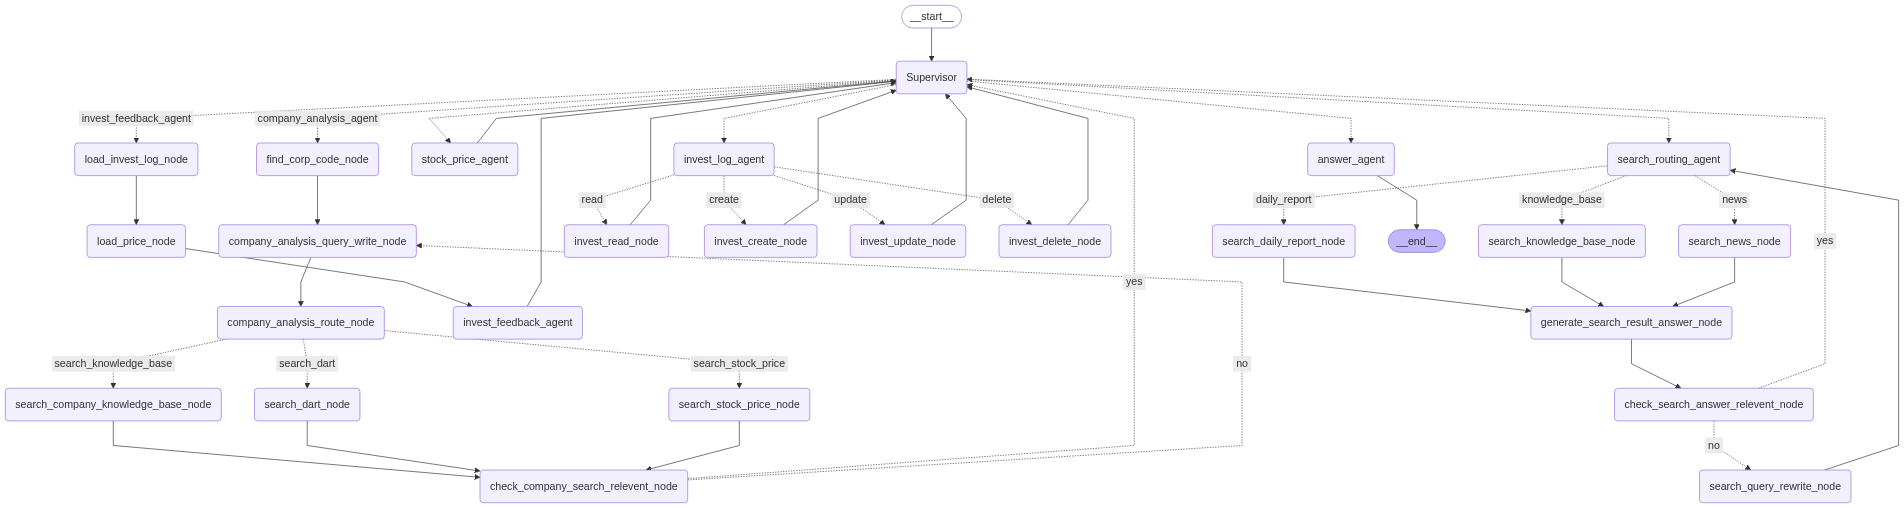

In [1]:
from app.agent.graphs.main_agent import main_agent
from app.utils.langgraph import visualize_graph

graph_app = main_agent()
visualize_graph(graph_app)

In [ ]:
from app.agent.states.basic_state import GraphState
from langchain_core.runnables import RunnableConfig
from app.utils.langgraph import random_uuid
from langchain_core.messages import HumanMessage, SystemMessage
from app.utils.langgraph import print_graph
from langgraph.checkpoint.memory import InMemorySaver

inputs = GraphState(
    messages=[
        HumanMessage(content="안녕"),
    ],
    remaining_steps=25,
    is_last_step=False,
    answer=""
)

config = RunnableConfig(recursion_limit=6, configurable={"thread_id": random_uuid()})

await print_graph(graph_app, dict(inputs), config, isPrintAll=True)

# graph_app.invoke(inputs, config)



 ( values )
content='안녕' additional_kwargs={} response_metadata={} id='15ad9cb7-ed3f-4ad4-b76e-cbe464aaee06'
----
{"next": "answer_agent"}
answer_agent ( messages )
(AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='run--c6ea6d36-dc3c-4a38-8f5c-6680cebe04d4'), {'thread_id': '1732e313-c2f5-4b53-bbe2-9cc935d54ccf', 'langgraph_step': 2, 'langgraph_node': 'answer_agent', 'langgraph_triggers': ('branch:to:answer_agent',), 'langgraph_path': ('__pregel_pull', 'answer_agent'), 'langgraph_checkpoint_ns': 'answer_agent:36c9932b-17ee-dc1c-81ab-be408ad8424e', 'checkpoint_ns': 'answer_agent:36c9932b-17ee-dc1c-81ab-be408ad8424e', 'ls_provider': 'naver', 'ls_model_name': 'HCX-005', 'ls_model_type': 'chat', 'ls_temperature': None})
----
answer_agent ( messages )
(AIMessageChunk(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='run--c6ea6d36-dc3c-4a38-8f5c-6680cebe04d4'), {'thread_id': '1732e313-c2f5-4b53-bbe2-9cc935d54ccf', 'langgraph_step': 2, 'langgraph_node':

In [ ]:
saved_state = graph_app.get_state(config)
saved_state

StateSnapshot(values={'messages': [HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}, id='15ad9cb7-ed3f-4ad4-b76e-cbe464aaee06'), AIMessage(content='안녕하세요! 저는 fingaroo입니다.\n\n사용자님을 도와드리기 위해 항상 준비되어 있으니, 궁금하신 부분이나 도움이 필요한 사항이 있으시면 언제든지 말씀해 주세요.', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'HCX-005'}, id='run--c6ea6d36-dc3c-4a38-8f5c-6680cebe04d4', usage_metadata={'input_tokens': 89, 'output_tokens': 37, 'total_tokens': 126, 'input_token_details': {}, 'output_token_details': {}})], 'answer': AIMessage(content='안녕하세요! 저는 fingaroo입니다.\n\n사용자님을 도와드리기 위해 항상 준비되어 있으니, 궁금하신 부분이나 도움이 필요한 사항이 있으시면 언제든지 말씀해 주세요.', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'HCX-005'}, id='run--c6ea6d36-dc3c-4a38-8f5c-6680cebe04d4', usage_metadata={'input_tokens': 89, 'output_tokens': 37, 'total_tokens': 126, 'input_token_details': {}, 'output_token_details': {}})}, next=(), config={'configurable': {'thread_id': '1732e313